In [1]:
install.packages('np')

Installing package into ‘/home/xenakas/R/x86_64-pc-linux-gnu-library/3.6’
(as ‘lib’ is unspecified)
also installing the dependency ‘cubature’



In [2]:
library(np)

Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-10)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]


In [54]:
x  <- cars$speed
y  <-  cars$dist

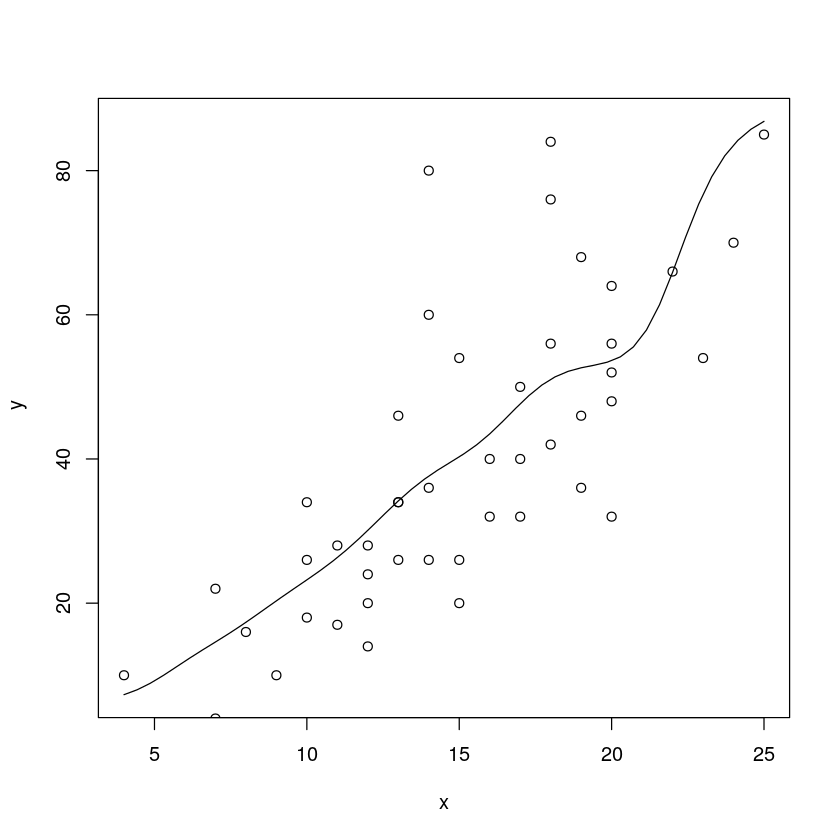

In [5]:
model  <-  npreg(txdat = x, tydat = y)
plot(model)
points(cars)

In [6]:
fitted(model)

[1]  7.305923  7.305923 14.611773 14.611773 17.343241 20.321717 23.230447
 [8] 23.230447 23.230447 26.328296 26.328296 30.099909 30.099909 30.099909
[15] 30.099909 34.181213 34.181213 34.181213 34.181213 37.628524 37.628524
[22] 37.628524 37.628524 40.299368 40.299368 40.299368 43.478220 43.478220
[29] 47.649160 47.649160 47.649160 51.053347 51.053347 51.053347 51.053347
[36] 52.647479 52.647479 52.647479 53.623123 53.623123 53.623123 53.623123
[43] 53.623123 65.887818 76.724792 83.564381 83.564381 83.564381 83.564381
[50] 86.835849

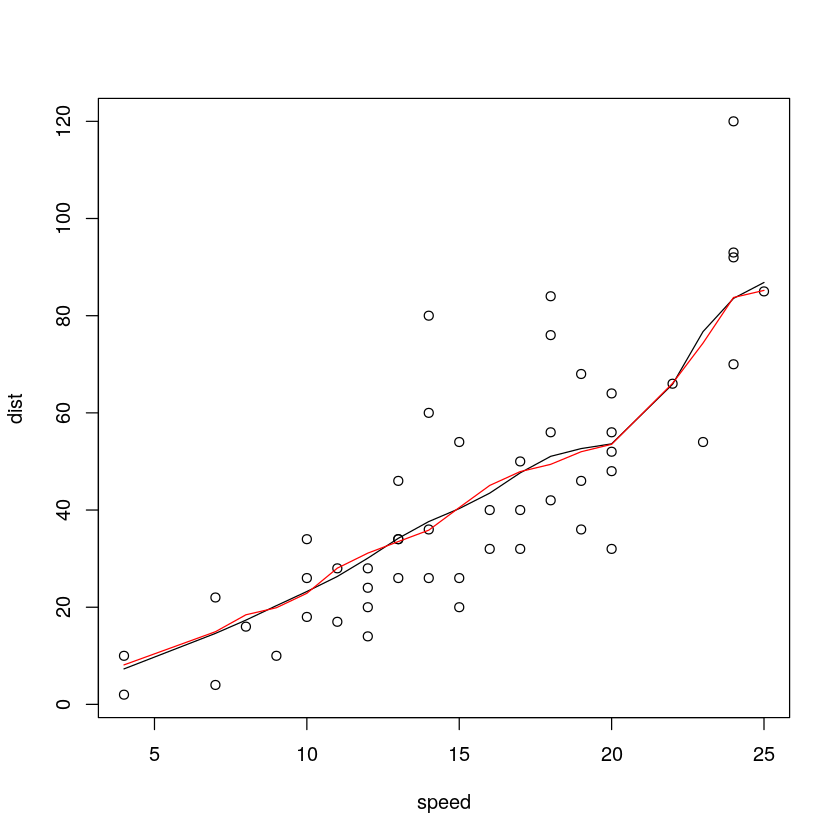

In [9]:
ker = c('gaussian', 'epanechnikov')
plot(cars)
for (j in 1:2){
    model  <-  npreg(txdat = x, tydat = y, ckertype = ker[j])
    points(x, fitted(model), type='l', col=j)
}

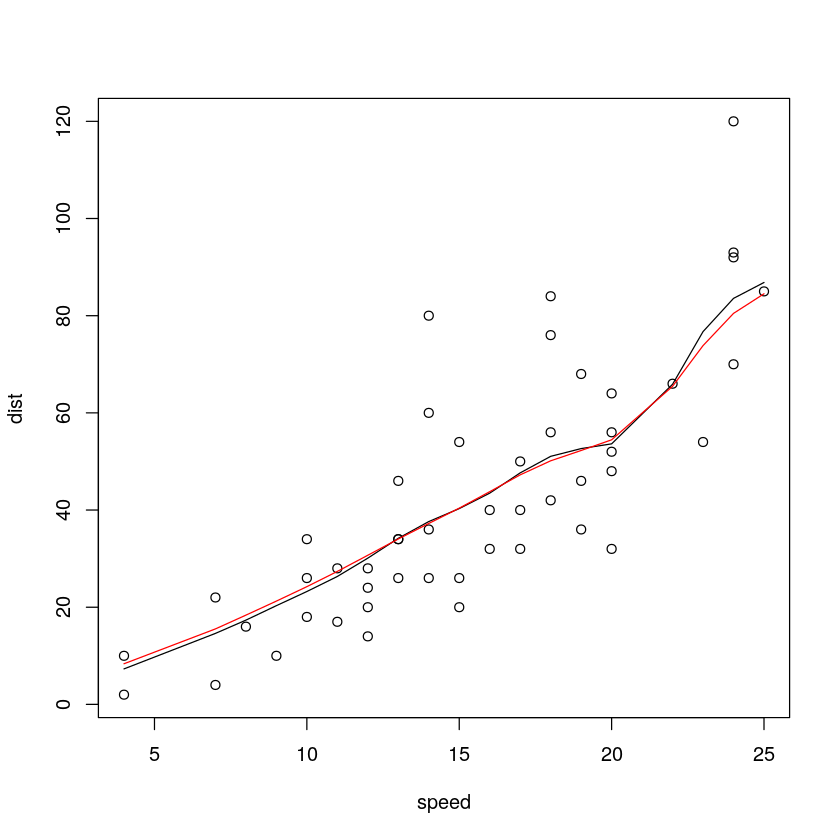

In [10]:
bw  <-  c('cv.ls', 'cv.aic')
plot(cars)
for (j in 1:2){
    model  <-  npreg(txdat = x, tydat = y, bwmethod = bw[j])
    points(x, fitted(model), type='l', col=j)
}

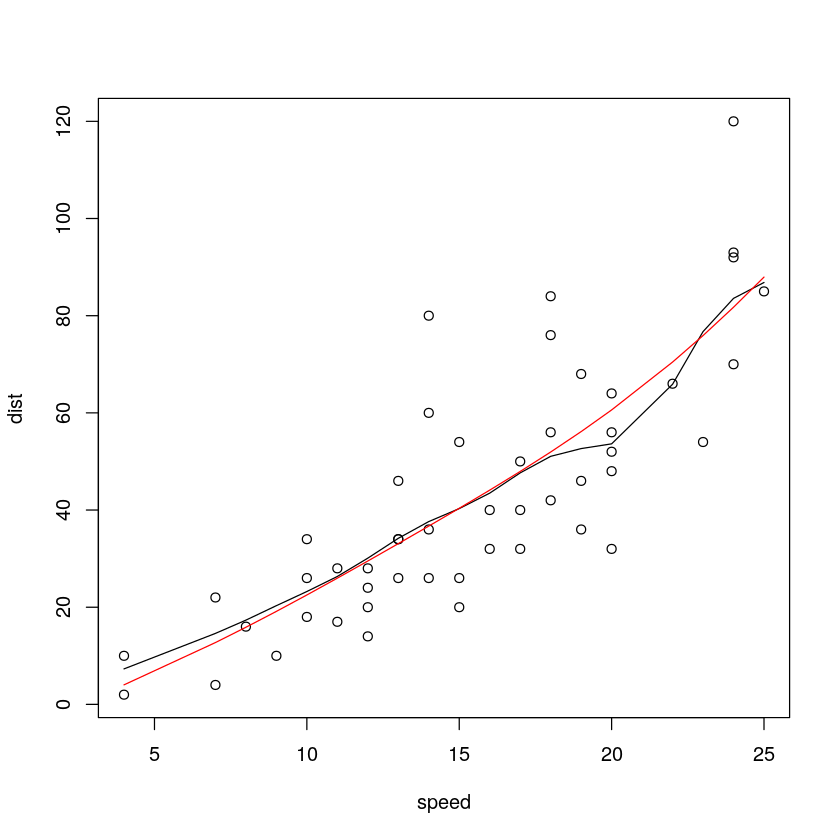

In [14]:
type  <-  c('lc', 'll') #locally constnat vs locally linear
plot(cars)
for (j in 1:2){
    model  <-  npreg(txdat = x, tydat = y, regtype = type[j])
    points(x, fitted(model), type='l', col=j)
}

In [18]:
res <- c()
ijk  <-  c()
for (i in 1:2) {
    for (j in 1:2) {
        for (k in 1:2) {
            
            model <- npreg(txdat = x, tydat = y, ckertype = ker[j],  bwmethod = bw[j], regtype = type[j])
            res  <-  c(res, mean((fitted(model)-y)^2))
            ijk  <- c(ijk, i*100+j*10+k )
            
        }
    }
}

In [22]:
ijk[which.min(res)]

[1] 111

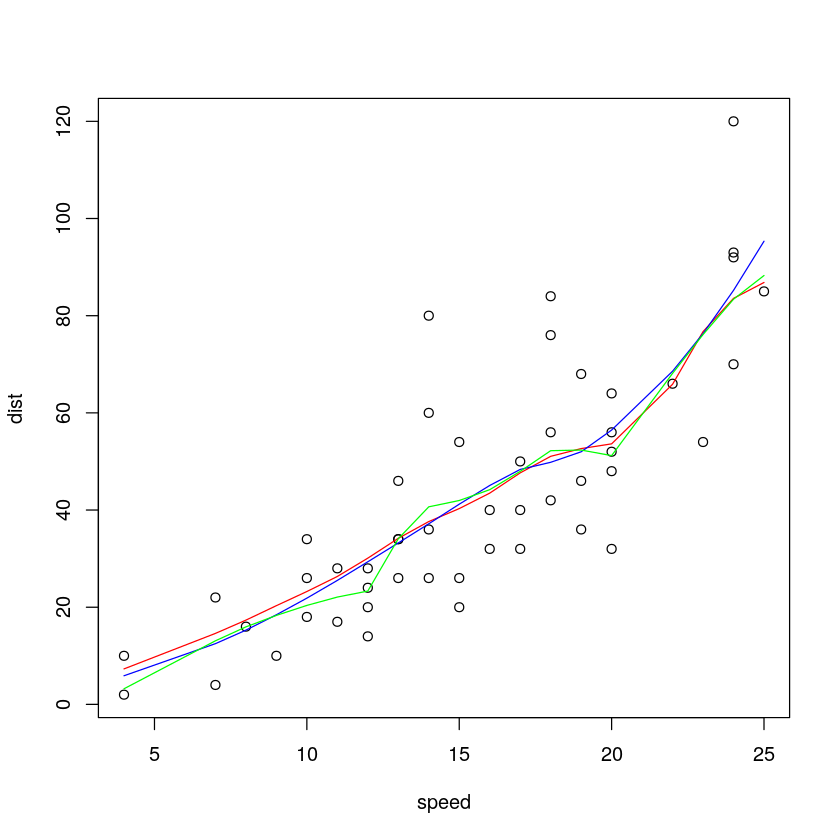

In [34]:
i  <-  j <-  k  <-  1
model <- npreg(txdat = x, tydat = y, ckertype = ker[j],  bwmethod = bw[j], regtype = type[j])

plot(cars)
points(x, fitted(model), col = 'red', type = 'l')

model2  <-  loess(y~x)
points(x, fitted(model2), col = 'blue', type = 'l')

model3  <-  supsmu(x, y)
yy  <- rep(0, length(x))
for (j in 1:length(x)){
    yy[j]  <- model3$y[model3$x == x[j]]
}
points(x, yy, col = 'green', type = 'l')

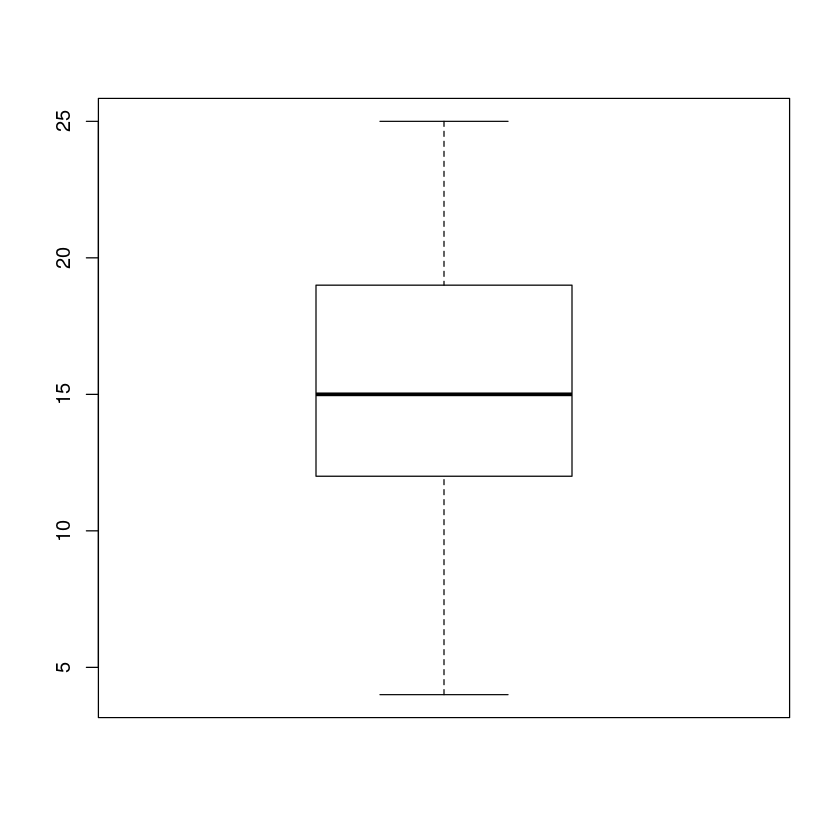

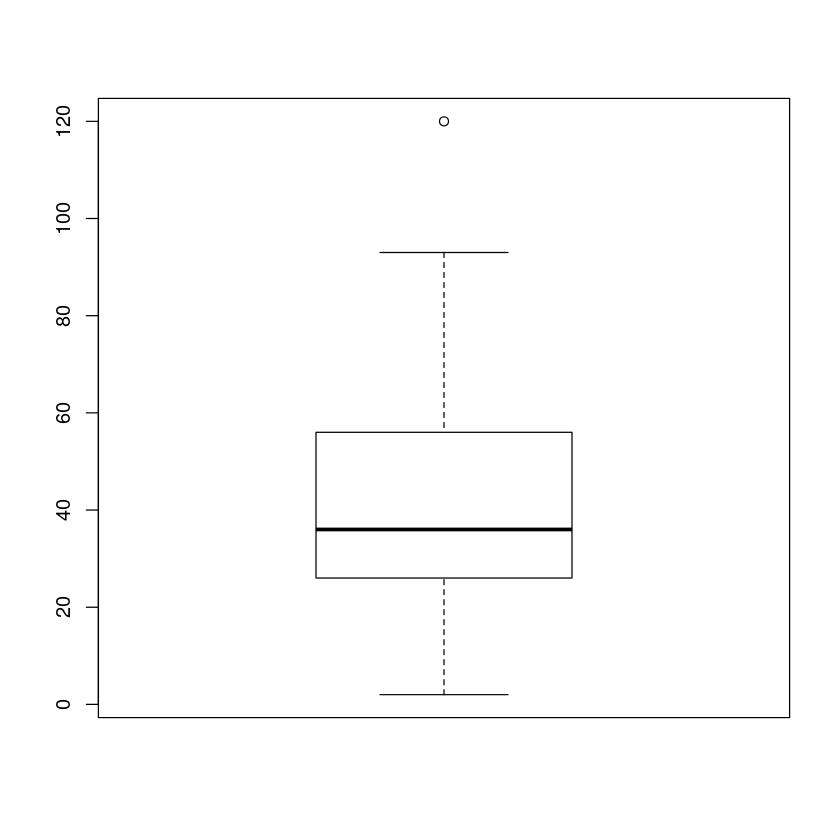

In [35]:
boxplot(x)
boxplot(y)

In [36]:
boxplot.stats(y)

$stats
[1]  2 26 36 56 93

$n
[1] 50

$conf
[1] 29.29663 42.70337

$out
[1] 120

In [76]:
x  <- x[-which(y%in%boxplot.stats(y)$out)]
y  <-  y[-which(y%in%boxplot.stats(y)$out)]



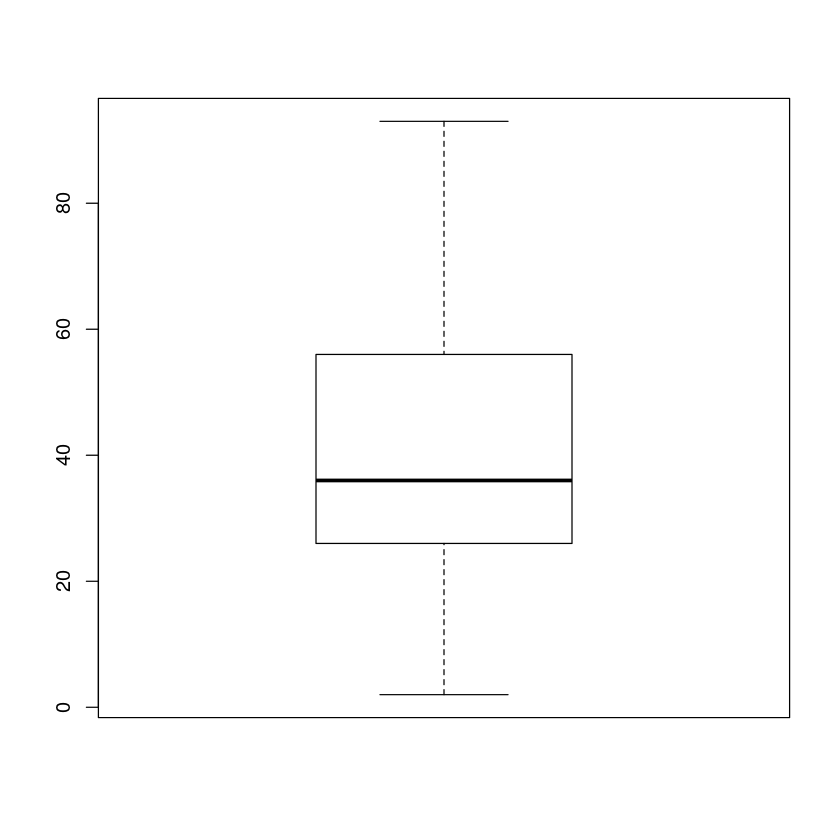

In [56]:
boxplot(y)

In [82]:
x  <- cars$speed
y  <-  cars$dist

x  <- x[-which(y%in%boxplot.stats(y)$out)]
y  <-  y[-which(y%in%boxplot.stats(y)$out)]


In [83]:
x_un  <- unique(x)
y_un <-  sapply(unique(x), function(z){ mean(y[which(x==z)])})

In [84]:
x_un

[1]  4  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25

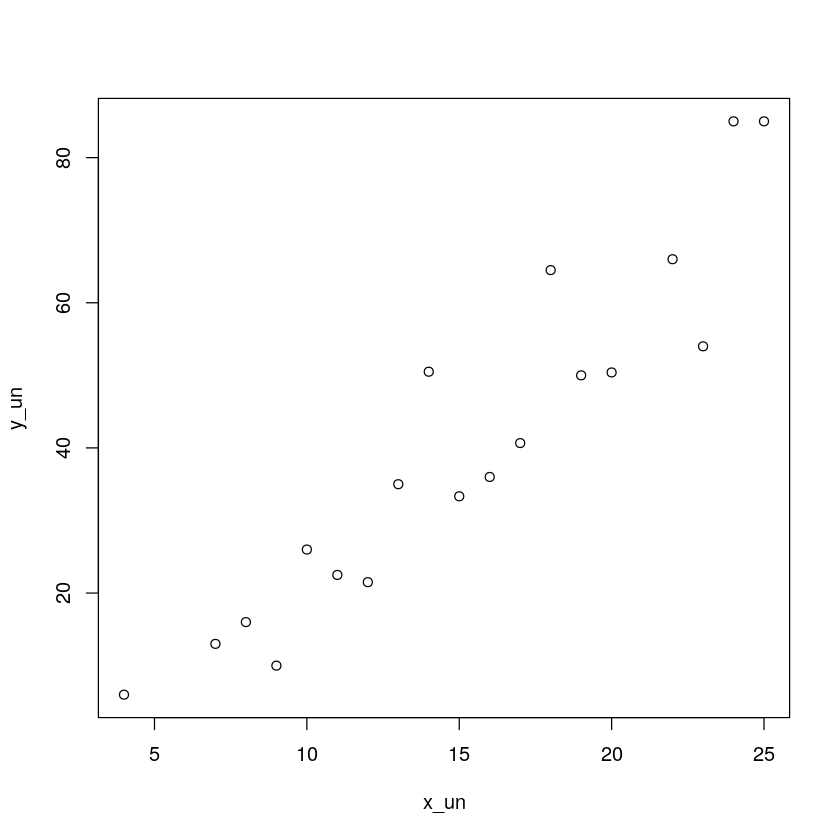

In [85]:
plot(x_un, y_un)